<h1><center>Customer Churn Prediction in the Telecom Industry</center></h1>
    

### <center>- Akhil Nair (UCF ID: 5562572)</center>

**Problem Statement:**
Customer churn significantly impacts telecommunications companies by affecting revenue, increasing customer acquisition costs, and reducing market share. It also harms the company's brand reputation, diminishes long-term customer relationships, and limits opportunities for upselling. Effectively managing churn is necessary for maintaining financial stability, ensuring that the company retains its competitive edge and keeps its investors’ confidence.

**Goal:** This project seeks to help mitigate customer churn at a telecom company. This would be done by performing extensive data analysis and data visualization to identify trends and understand customer behavior and gain insights into the factors that might be causing them to leave the company. We also make use of machine learning models to predict customer churn in this complex dataset, allowing the company to actively engage these at-risk customers, leading to better customer satisfaction and sustained business growth.

In [1]:
#Importing the necessary libraries for data manipulation, numerical operations and basic visualization:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Loading the data:
customer_churn = pd.read_csv("customer_churn.csv") 

# Exploratory Data Analysis:

##  1. Understanding the data:

In [3]:
#Checking the rows and understanding the structure of the data:
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Checking the male senior citizens with whose payment method is 'electronic check':
senior_male_electronic = customer_churn[
    (customer_churn['gender'] == 'Male') &
    (customer_churn['SeniorCitizen'] == 1) &
    (customer_churn['PaymentMethod'] == 'Electronic check')
]
senior_male_electronic.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No


In [5]:
#Identifying the customers with 'tenure' over 70 or with 'MonthlyCharges' over 100:
customer_total_tenure = customer_churn[
    (customer_churn['tenure'] > 70) | 
    (customer_churn['MonthlyCharges'] > 100)
]
customer_total_tenure.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No


In [6]:
#Identifying the individuals whose contracts last two years, payment method is 'Mailed Check', and who end up churning:
two_mail_yes = customer_churn[
    (customer_churn['Contract'] == 'Two year') & 
    (customer_churn['PaymentMethod'] == 'Mailed check') & 
    (customer_churn['Churn'] == 'Yes')
]
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [7]:
#Extracting 333 random records
customer_333=customer_churn.sample(n=333)
customer_333.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3664,6257-RJOHI,Male,0,No,No,4,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,50.80,202.3,No
3361,8659-HDIYE,Female,1,No,No,64,Yes,Yes,DSL,No,...,Yes,Yes,No,Yes,Month-to-month,No,Credit card (automatic),74.65,4869.35,No
3043,3677-IYRBF,Female,1,No,No,2,No,No phone service,DSL,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,30.40,78.65,Yes
997,1374-DMZUI,Female,1,No,No,4,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.30,424.45,Yes
342,7520-HQWJU,Female,0,Yes,Yes,66,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),67.45,4508.65,No


In [8]:
len(customer_333)

333

In [9]:
#Identifying the churned vs retained customers:
customer_churn['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

This tells us that most customers in this dataset do not end up leaving the telecom company.

## 2. Data Visualization:

In [10]:
%matplotlib inline
#Plotly express helps with simple, straightforward visualizations. Here we attempt to check the 'gender' column to identify which gender is more likely to churn.
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

gender_counts = customer_churn['gender'].value_counts()
churn_counts = customer_churn['Churn'].value_counts()
fig = make_subplots(rows=1, cols=2, subplot_titles=("Gender Distribution", "Churn Distribution"))
fig.add_trace(
    go.Bar(x=gender_counts.index, y=gender_counts.values, marker_color='deepskyblue', name='Gender'),
    row=1, col=1
)
fig.add_trace(
    go.Bar(x=churn_counts.index, y=churn_counts.values, marker_color='crimson', name='Churn'),
    row=1, col=2
)
fig.update_layout(
    title_text="Gender vs Churn Distributions:",
    showlegend=True
)
fig.show()

This shows us that about 1/4th of the customers churned, and that the individuals are roughly equally distributed among the two genders we see in this dataset.

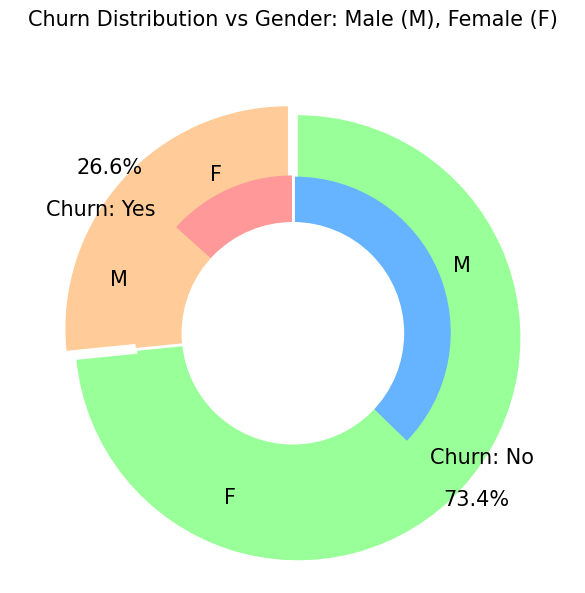

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
labels = ["Churn: Yes", "Churn: No"]
values = [1869, 5163]
labels_gender = ["F", "M", "F", "M"]
sizes_gender = [939, 930, 2544, 2619]
colors = ['#ffcc99', '#99ff99'] 
colors_gender = ['#ff9999', '#ffcc99', '#99ff99', '#66b3ff']

#We use pie charts, and define explosion settings for more clarity between the rings:
explode = (0.3, 0.3)
explode_gender = (0.1, 0.1, 0.1, 0.1)
textprops = {"fontsize": 15}
plt.pie(values, labels=labels, autopct='%1.1f%%', pctdistance=1.08, labeldistance=0.8,
        colors=colors, startangle=90, frame=True, explode=explode, radius=10,
        textprops=textprops, counterclock=True)
plt.pie(sizes_gender, labels=labels_gender, colors=colors_gender, startangle=90,
        explode=explode_gender, radius=7, textprops=textprops, counterclock=True)
centre_circle = plt.Circle((0, 0), 5, color='black', fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Churn Distribution vs Gender: Male (M), Female (F)', fontsize=15, y=1.1)
plt.axis('equal')
plt.tight_layout()
plt.show()

This shows us that about 1/4th of the individuals churn, and 3/4ths are retained.

In [12]:
import plotly.graph_objects as go
contract_churn_counts = customer_churn.groupby(['Contract', 'Churn']).size().unstack(fill_value=0)

#We now use a stacked bar chart to identify any possible relations between the contract term and churn:
fig = go.Figure()
for churn_status in contract_churn_counts.columns:
    fig.add_trace(go.Bar(x=contract_churn_counts.index,y=contract_churn_counts[churn_status],name=f"Churn: {churn_status}"))
fig.update_layout(barmode='stack',title='<b>Customer Contract and their Churn Status:<b>', xaxis_title='Contract Type',yaxis_title='Count',width=700,height=500)
fig.show()

Based on the contract types, we see that the customers with a month-to-month contract are much more likely to change providers, as opposed to those with year long or two year long contracts.

In [13]:
import plotly.express as px
labels = customer_churn['PaymentMethod'].unique()
values = customer_churn['PaymentMethod'].value_counts()

#We now use a Treemap to identify the payment methods and their counts:
data = pd.DataFrame({'PaymentMethod': labels,'Count': values}).sort_values('PaymentMethod')

fig = px.treemap(data, path=['PaymentMethod'], values='Count',color='PaymentMethod',color_discrete_map={'Electronic check': 'lightblue','Mailed check': 'lightgreen','Bank transfer (automatic)': 'lightcoral','Credit card (automatic)': 'violet'})
fig.update_layout(title_text="<b>Payment Method Distribution:</b>")
fig.show()

This tells us that the majority of customers pay by electronic check. Now we can try to identify the relation between these payment methods and churn.

In [14]:
import plotly.graph_objects as go
churn_payment_counts = customer_churn.groupby(['Churn', 'PaymentMethod']).size().unstack()

#We now use a grouped bar chart to identify any possible relations between the four payment methods and churn:
fig = go.Figure()
for payment_method in churn_payment_counts.columns:
    fig.add_trace(go.Bar(x=churn_payment_counts.index,  y=churn_payment_counts[payment_method],name=payment_method))
fig.update_layout(barmode='group',title='<b>Customer Payment Method Distribution vs Churn:</b>',xaxis_title='Churn Status',yaxis_title='Count',width=700,height=500,bargap=0.1)
fig.show()

This tells us that there exists a clear relation between the customers who used Electronic checks and the ones that left the telecom company. The other payment methods have quite similar attrition rates, with mailed checks being related to more churn. 

Automated bank transfer and credit card options have the lowest churn rates, which suggests having purely automated payment methods could in help reduce churn, but this might also cause the company to lose out on a large chunk of their customer base, since most customers pay by electronic check.

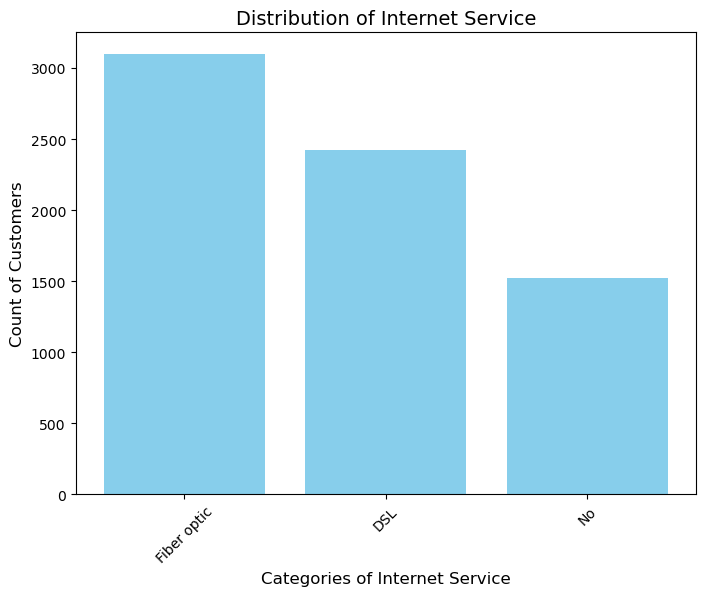

In [15]:
internet_service_counts = customer_churn['InternetService'].value_counts()

#We now create a bar plot to understand the 'InternetService' column:
plt.figure(figsize=(8, 6))
plt.bar(internet_service_counts.index, internet_service_counts.values, color='skyblue')
plt.xlabel('Categories of Internet Service', fontsize=12)
plt.ylabel('Count of Customers', fontsize=12)
plt.title('Distribution of Internet Service', fontsize=14) 
plt.xticks(rotation=45)
plt.show()

Most customers have opted for for fiber optic internet, followed by DSL, followed by no internet service at all.

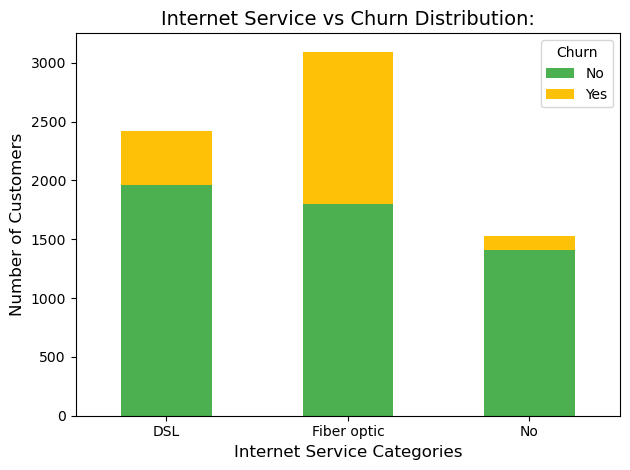

In [16]:
churn_service_counts = customer_churn.groupby(['InternetService', 'Churn']).size().unstack(fill_value=0)

#We now use a stacked bar chart to identify the relationship between internet service type and churn.
churn_service_counts.plot(kind='bar', stacked=True, color=['#4CAF50', '#FFC107'])
plt.xlabel('Internet Service Categories', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.title('Internet Service vs Churn Distribution:', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

This tells us that users who opt for fiber optic internet are much more likely to churn, as opposed to those with no internet. A possible reason could be that they are most tech-savvy and could have found better deals at other telecom companies.

In [17]:
import plotly.express as px

#Using pie charts to undetstand the relation between the presence of tech support and churn:
filtered_data = customer_churn[customer_churn['TechSupport'].notna()]
fig = px.pie(filtered_data, names='Churn', color='TechSupport',title='<b>Churn Distribution vs Tech Support:</b>',facet_col='TechSupport',color_discrete_map={'No': 'lightblue', 'Yes': 'lightgreen', 'No internet service': 'grey'})
fig.update_layout(width=700, height=500)
fig.update_traces(textinfo='percent+label', pull=[0.1, 0])
fig.show()

Customers who opt for tech support or are provided with it are significantly less likely to churn.

Text(0.5, 1.0, 'Distribution of tenure:')

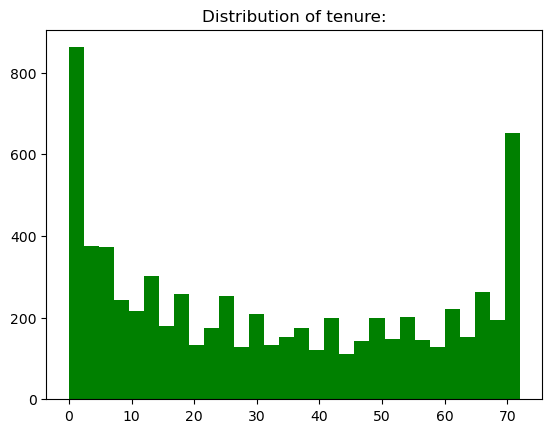

In [18]:
#Glancing over the 'tenure' column:
plt.hist(customer_churn['tenure'],color='green',bins=30)
plt.title('Distribution of tenure:')

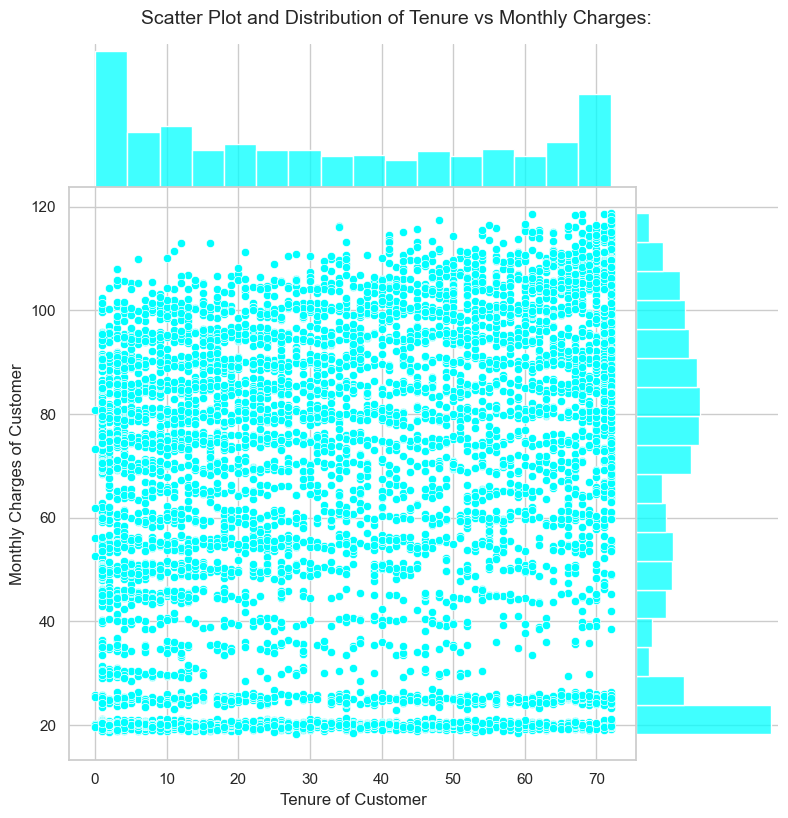

In [19]:
import seaborn as sns

#Using a jointplot to further know how tenure might be related to the cost of services:
sns.set(style="whitegrid")
joint = sns.jointplot(x='tenure', y='MonthlyCharges', data=customer_churn, kind='scatter', color='cyan', space=0, height=8, ratio=4)

joint.set_axis_labels('Tenure of Customer', 'Monthly Charges of Customer', fontsize=12)
joint.fig.suptitle('Scatter Plot and Distribution of Tenure vs Monthly Charges:', fontsize=14, y=1.02)

plt.show()

This might hint at lower monthly charges having the customers stay for longer periods. Customers with the highest monthly charges have some of the highest attrition rates.

In [20]:
#We now use a grouped bar chart to understand the relation between the presence of online security and churn rates:
import plotly.graph_objects as go
security_churn_counts = customer_churn.groupby(['OnlineSecurity', 'Churn']).size().unstack(fill_value=0)
fig = go.Figure()

for churn_status, color in zip(security_churn_counts.columns, ["#FF97FF", "#AB63FA"]): 
    fig.add_trace(go.Bar(x=security_churn_counts.index,y=security_churn_counts[churn_status],name=f"Churn: {churn_status}",marker_color=color))

fig.update_layout(barmode='group',title='<b>Churn Distribution vs Online Security:</b>',xaxis_title='Online Security Status',yaxis_title='Count of Customers',width=700,height=500,bargap=0.1)
fig.show()

This tells us that for customers with online security are far less likely to leave. Also, those with no plan for internet service are also not affected by the presence of online security.

In [21]:
#Using a stacked bar chart to understand relations between the presence of phone service and churn:
phone_service_churn_counts = customer_churn.groupby(['PhoneService', 'Churn']).size().unstack(fill_value=0)
fig = go.Figure()
colors = {'Yes': 'crimson', 'No': 'lightcoral'}
for churn_status in phone_service_churn_counts.columns:
    fig.add_trace(go.Bar(x=phone_service_churn_counts.index,  y=phone_service_churn_counts[churn_status],name=f"Churn: {churn_status}",marker_color=colors[churn_status]))
    
fig.update_layout(barmode='stack',title='<b>Churn Distribution vs Phone Service:</b>',xaxis_title='Phone Service Status',yaxis_title='Count of Customers',width=700,height=500,bargap=0.1)
fig.show()

Most customers do have phone service, and about a fourth of those are likely to churn. Those with no phone plans are less likely to churn.

In [22]:
#We now move onto the relation between those with dependents and how much of those churn:
dependents_churn_counts = customer_churn.groupby(['Dependents', 'Churn']).size().unstack(fill_value=0)
fig = go.Figure()
for dependent_status in dependents_churn_counts.index:
    fig.add_trace(go.Pie(labels=dependents_churn_counts.columns,values=dependents_churn_counts.loc[dependent_status],name=f"Dependents: {dependent_status}",hole=0.3))
    
fig.update_layout(title='<b>Churn Distribution vs Dependents:</b>',width=700,height=500)
fig.show()

Individuals with dependents are much less likely to churn (84.5%) as opposed to those without any dependents.

In [23]:
#Now we use a histogram to see how having partners affects customer churn:
fig = px.histogram(customer_churn, x="Churn", color="Partner", barmode="group", title="<b>Churn distribution vs Partners:</b>", color_discrete_map={"Yes": 'cyan', "No": 'lime'})
fig.update_traces(marker_line_width=1.5)
fig.update_layout(width=500, height=500, bargap=0.1)
fig.show()

This tells us that individuals with no partners are much more likely to churn. Nearly half of those without partners end up leaving the service.

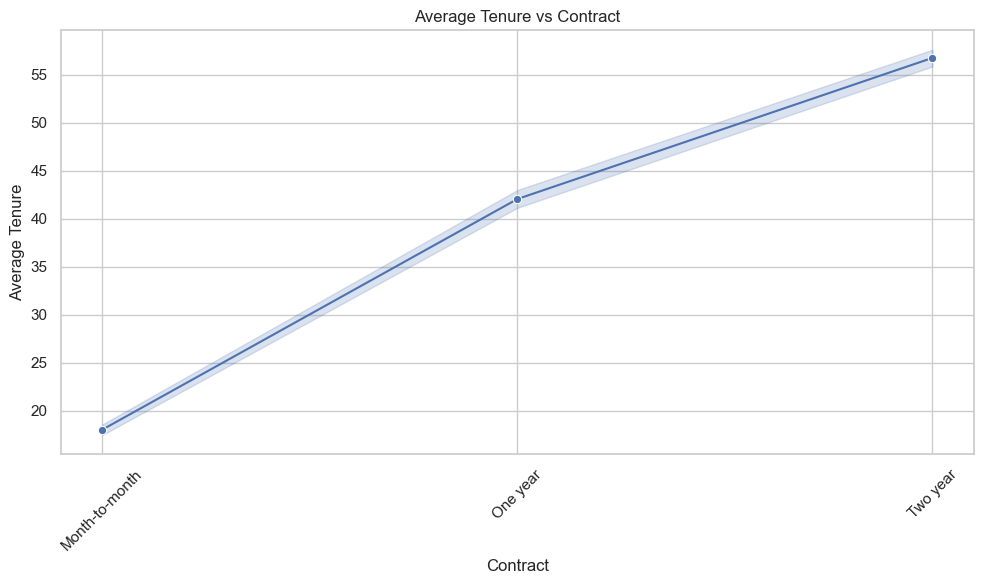

In [24]:
#We now explore the relation between the type of contract and customer tenure:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=customer_churn, x='Contract', y='tenure', marker='o')
plt.title('Average Tenure vs Contract')
plt.xlabel('Contract')
plt.ylabel('Average Tenure')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This shows us that smaller, month-to-month contracts show significantly higher churn rates than a year or two year long contracts.

# Insights so far:

1.	Senior citizens: Have a churn rate of nearly 50%. A detailed analysis by the company to identify what causes this would help prevent churn.

2.	Type of internet: Although Fiber optic seems to be preferred, almost 50% of its users end up churning. This might be due to the demand and nature of fiber optic services. Being a modern, high speed internet service, various companies may be providing similar services for competitive rates.

3.	Technical support: About 50% without competent technical support services experience churn. This is something that could be addressed by having a solid technical support team in place and providing the users with an easy way to contact the team.

4.	Contracts: Most customers go for monthly contracts, but nearly 50% leave the company. Yearlong or two yearlong contracts have a much higher chance of retaining the customers. This could be indicative of monthly contracts being less attractive compared to monthly contracts offered by other companies.

5.	Payment method: Customers opting for electronic checks as their payment method are the most likely to churn, about 4 times more likely than mailed checks or credit/debit card payers. Automated credit/debit cards seem to be the best payment method for retaining customers. However, since most customers use electronic checks (over a third), sudden changes in the payment method must be exercised with caution.

6.	Tenure: Customers tend to churn when they just join the service, which indicates better support would help in getting them past this initial phase where they might decide to leave the telecom company.

7.	Costs: Customers with higher charges, over 100 USD a month are very likely to churn. Tailored assistance would be beneficial in handling these users and offering them competitive rates and offers better than other companies might help retain these high paying individuals.


# Model Development:

In [26]:
#Checking the importance of features with Recursive Feature Elimination (RFE):
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in customer_churn.select_dtypes(include=['object']).columns:
    if column != 'customerID':
        le = LabelEncoder()
        customer_churn[column] = le.fit_transform(customer_churn[column])
        label_encoders[column] = le

# Separate features and target variable
X = customer_churn.drop(columns=['Churn', 'customerID'])
y = customer_churn['Churn']

# Define the model
model = LogisticRegression(max_iter=1000)

# Use RFE for feature selection
rfe = RFE(estimator=model, n_features_to_select=10)  # Number of features to select
rfe.fit(X, y)

# Create a DataFrame to display feature ranking
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': rfe.ranking_})
feature_ranking = feature_ranking.sort_values(by='Ranking')

print(feature_ranking)

             Feature  Ranking
9       OnlineBackup        1
1      SeniorCitizen        1
3         Dependents        1
4             tenure        1
5       PhoneService        1
6      MultipleLines        1
8     OnlineSecurity        1
11       TechSupport        1
15  PaperlessBilling        1
14          Contract        1
10  DeviceProtection        2
16     PaymentMethod        3
7    InternetService        4
17    MonthlyCharges        5
0             gender        6
13   StreamingMovies        7
2            Partner        8
12       StreamingTV        9
18      TotalCharges       10


## 1. Logistic Regression Model:

In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#Selecting features for logistic regression:
X = customer_churn[['MonthlyCharges', 'Contract', 'InternetService', 'PaymentMethod']]
y = customer_churn['Churn']

X_encoded = pd.get_dummies(X, columns=['Contract', 'InternetService', 'PaymentMethod'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, train_size=0.65, random_state=0)
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
y_pred = logmodel.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy_logistic = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy Score:", accuracy_logistic)
print("\nClassification Report:")
print(classification_rep)

Confusion Matrix:
[[1610  205]
 [ 358  293]]

Accuracy Score: 0.7716950527169505

Classification Report:
              precision    recall  f1-score   support

          No       0.82      0.89      0.85      1815
         Yes       0.59      0.45      0.51       651

    accuracy                           0.77      2466
   macro avg       0.70      0.67      0.68      2466
weighted avg       0.76      0.77      0.76      2466



C:\Users\rianl\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



## 2. Multiple Logistic Regression Model:

In [35]:
#Selecting two features for multiple logistic regression to see how these two affect customer churn:
X = customer_churn[['MonthlyCharges', 'tenure']]
y = customer_churn['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=0)

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
y_pred = logmodel.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

Accuracy: 0.7735982966643009
[[934 107]
 [212 156]]
              precision    recall  f1-score   support

          No       0.82      0.90      0.85      1041
         Yes       0.59      0.42      0.49       368

    accuracy                           0.77      1409
   macro avg       0.70      0.66      0.67      1409
weighted avg       0.76      0.77      0.76      1409



## 3. Decision Tree Model:

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

X = customer_churn[['tenure']]
y = customer_churn['Churn']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))

[[965  76]
 [281  87]]
Accuracy: 0.7466288147622427


## 4. Random Forest Model:

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#Selecting 'tenure' and 'MonthlyCharges' as the features and 'Churn' as the target variable:
X = customer_churn[['tenure', 'MonthlyCharges']]
y = customer_churn['Churn']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[882 159]
 [227 141]]
Accuracy: 0.7260468417317246


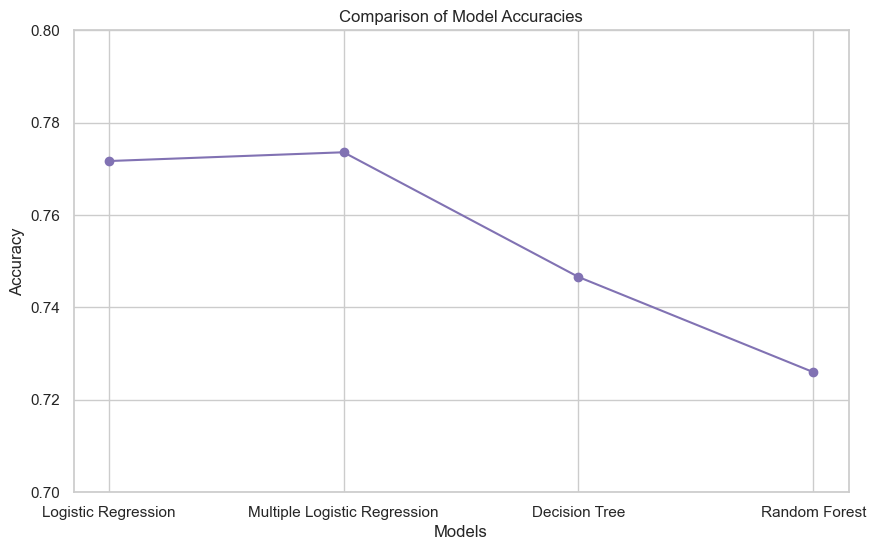

In [40]:
models = ['Logistic Regression', 'Multiple Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [0.77169, 0.77359, 0.7466, 0.7260]
plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o', linestyle='-', color='m')
plt.title('Comparison of Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim([0.7, 0.8]) 
plt.grid(True)
plt.show()

The Multiple logistic regression and the logistic regression models showed better performance, and the reason for this might be that there exists a linear relationship between features such as ‘tenure’ and ‘MonthlyCharges’ and the target variable ‘Churn’.